# Lab 1 - Balancing Pole on Cart  

### Team Members
|Name|
|---|
Kaung Set@John Xie|
|Wong Rong Jing|


Notes:
We trained the q-table on ~ 15 million episodes, saved to a .npy file for later loading  
File can run-all since we set default training to 10 episodes
Run on Python 3.10.7 using libraries in requirements.txt

### Honour Code:  
Q-learning Algo: Implemented psuedocode in course slides  
Video Recording Code: Adapted from https://github.com/yue-zhongqi/cartpole_colab and https://www.kaggle.com/code/toshikazuwatanabe/how-to-show-cartpole  



# Training Code
(Tasks near end)

In [57]:
import gymnasium as gym
from gymnasium import logger as gymlogger
from gymnasium.wrappers import RecordVideo
import numpy as np
from random import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

env = gym.make('CartPole-v1')

This section is for binning, since the values returned are continous, but Q-learning is discrete, so we round each value to nearest binSize (either 0.1 or 0.01)  
Some tools also for converting observation into index

In [58]:
def test():
    #Get max angular velocity and cart velocity
    #actions: 0 = left, 1 = right
    #cartPos,cartV,poleAngle,poleAngularV
    tests = 1000
    maxCartPos = 0
    maxPoleAngle = 0
    maxAngularV = 0
    maxCartV = 0

    while tests > 0:
        env.reset()
        done = False
        while not done:
            observation, reward, done, info, useless = env.step(0) #always go left
            if tests == 1:
                print(observation)
            cartPos,cartV,poleAngle,poleAngularV = observation
            if abs(poleAngularV) > maxAngularV:
                maxAngularV = abs(poleAngularV)
            if abs(cartV) > maxCartV:
                maxCartV = abs(cartV)
            if abs(cartPos) > maxCartPos:
                maxCartPos = abs(cartPos)
            if abs(poleAngle) > maxPoleAngle:
                maxPoleAngle = abs(poleAngle)
        tests -= 1
    print("Final maxCartPos =",maxCartPos)
    print("Final maxCartV =",maxCartV)
    print("Final maxPoleAngle =",maxPoleAngle)
    print("Final maxAngularV =",maxAngularV)
#test()


From testing, we shall take below max values for binning:  
cartPos: 0.28  
cartV: 2.2  
poleAngle: 0.28  
angularV: 3.4  

In [59]:
#Setup for Q-learning

dims = [0.28, 2.2, 0.28, 3.4]
binSize = [0.01, 0.1, 0.01, 0.1]
shape = [int(x//y*2)+1 for x, y in zip(dims, binSize)]
shape.append(2)
#Add bins to make contiuous into discrete

qtable = np.load('qtable.npy')
print(qtable.shape)


(57, 45, 57, 67, 2)


In [60]:
# Tools for binning
def getIndex(observation):
    global dims
    global binSize
    global shape
    indices = []
    for max, value, interval,dimension in zip(shape,observation,binSize,dims):
        index = round((value + dimension) / interval)-1 #round and get the index, add dimension cause of -ve value
        if (0 <= index < max):
            indices.append(index)
        else:
            # print(observation,"exceeded max")
            return None
    return indices


Initial Training (implement this slide)
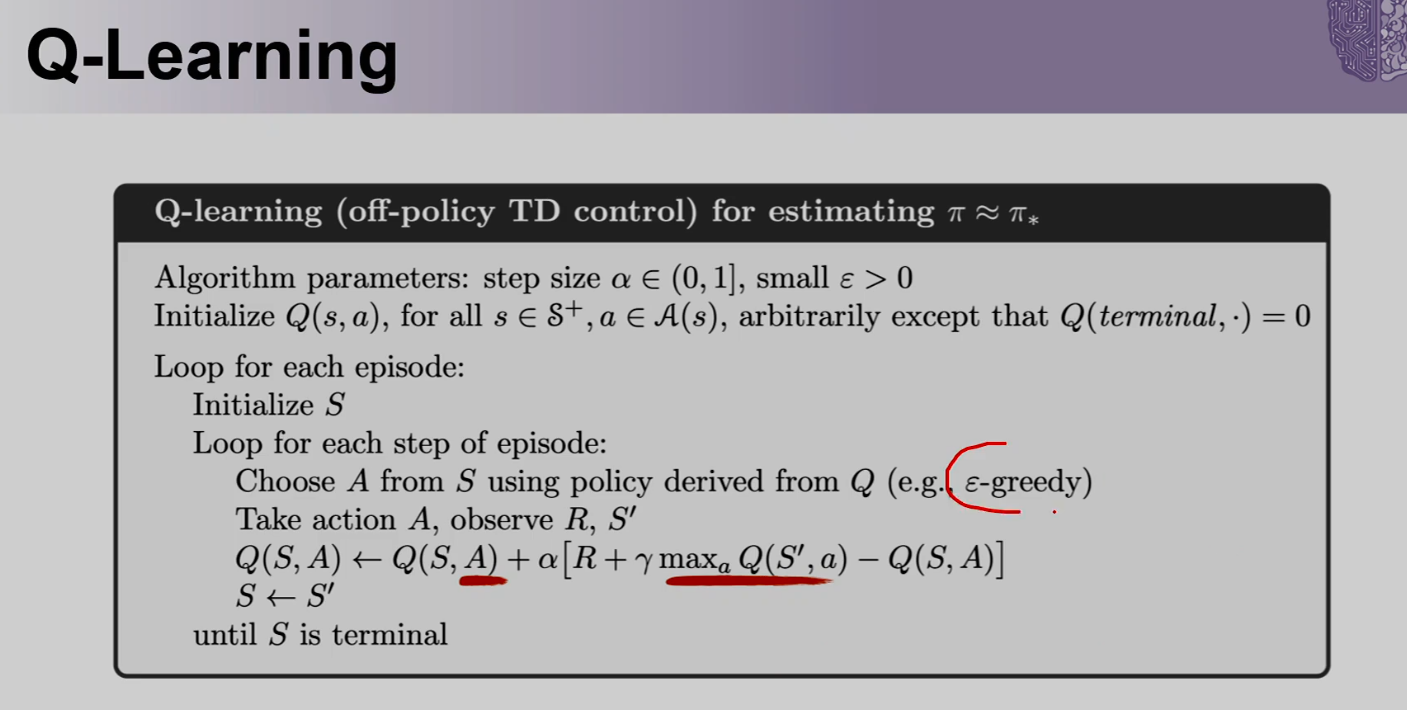


In [61]:
# y = discount, A = learning rate, R = reward, E = exploration probabiliy / epsilon
def updateQtable(preObs, postObs, action, R = 1, y = 0.9, A = 0.5):
    global qtable
    try:
        a,b,c,d = getIndex(preObs)
        f,g,h,i = getIndex(postObs)
        postQMax = max(qtable[f, g, h, i, ...])
        gain = A * (R + (y * postQMax) - qtable[a,b,c,d,action])
        qtable[a,b,c,d,action] += gain
        return gain
    except TypeError:
        return 0


def policy(observation, E = 0.1):
    global qtable
    if random() < E:
        return round(random())
    try:
        a,b,c,d = getIndex(observation)
        left,right = qtable[a, b, c, d, ...]
    except TypeError:
        return round(random())
    if left > right:
        return 0
    elif left < right:
        return 1
    else:
        return round(random())




In [62]:
def runEpisode():
    #Stores the obs, reward, action taken
    #Action stored in the S, not S'
    #actions: 0 = left, 1 = right
    #cartPos,cartV,poleAngle,poleAngularV
    episode = list()
    preObs, useless = env.reset()
    done = False
    reward = 0
    while not done:
        action = policy(preObs)
        postObs, reward, done, info, useless = env.step(action) #go to next state
        updateQtable(preObs, postObs, action)
        preObs = postObs
runEpisode()


In [63]:
print(np.amax(qtable)) 

9.999999990427156


In [64]:
def BatchTrain(n = 10): #Train for n episodes
    for _ in range(n):
        runEpisode()
    print(np.amax(qtable))
BatchTrain()

9.99999999106717


In [65]:
np.save('qtable.npy', qtable) #Save the qtable to disk


# Tasks

## Task 1  
Task 1: Development of an RL agent. Demonstrate the correctness of the implementation by sampling a random state from the cart pole environment, inputting to the agent, and outputting a chosen action. Print the values of the state and chosen action in Jupyter notebook.

In [75]:
observation = env.reset()
action = policy(observation,0) #Epsilon = 0
print("Observation:",observation)
print("Chosen action:",action)

Observation: (array([-0.01456384,  0.02676274, -0.03838864,  0.0330362 ], dtype=float32), {})
Chosen action: 0


## Task 2
Task 2: Demonstrate the effectiveness of the RL agent. Run for 100 episodes (reset the environment at the beginning of each episode) and plot the cumulative reward against all episodes in Jupyter. Print the average reward over the 100 episodes. The average reward should be larger than 195

In [66]:
def score():
    env = gym.make('CartPole-v1')
    preObs, useless = env.reset()
    
    done = False
    total = 0
    for i in range(500): # Environment dosent stop automatically after 500 steps
        action = policy(preObs,0) # Epsilon = 0 for scoring
        data = env.step(action)
        postObs, reward, done, info, useless = data #go to next state
        # print(i, reward, done)
        total += int(reward)
        preObs = postObs
        if done:
            break
    return total


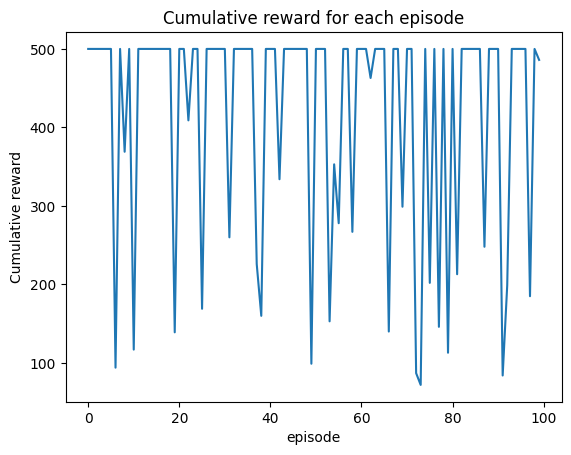

Average cumulative reward: 418.64
Is my agent good enough? True


In [76]:

episode_results = np.array([score() for _ in range(100)])
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()


print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

## Task 3
Render one episode played by the developed RL agent on Jupyter. Please refer to the sample code link for rendering code  


In [88]:

vEnv = RecordVideo(gym.make("CartPole-v1", render_mode = "rgb_array"), "./video")
preObs, useless = vEnv.reset()
done = False
reward = 0
for i in range(1000):
    action = policy(preObs,0)
    postObs, reward, done, info, useless = vEnv.step(action) #go to next state
    preObs = postObs
    if done:
        break
vEnv.close()
from IPython.display import Video
Video("./video/rl-video-episode-0.mp4",embed=True)


Moviepy - Building video c:\Users\Arjay\Desktop\SC3000\video\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\Arjay\Desktop\SC3000\video\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\Arjay\Desktop\SC3000\video\rl-video-episode-0.mp4
